<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/sanghunoh/reports/Term_2_CNN_MPIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Connect Drive

In [1]:
path_root = '/content/drive/MyDrive/datas/'

# 작업 경로 설정
import os
os.chdir(path_root)
!pwd

/content/drive/.shortcut-targets-by-id/1tHYgEz3lQF-LmtFPXRgMBDh4UN54qeAs/datas


In [2]:
# !unzip -o ./mpie_30_shuffle.zip -d ./mpie_30_shuffle

In [3]:
!ls

dataCh4_7.mat		iris_shuffle.mat	 mpie_30_shuffle
dataCh4_7.zip		iris.zip		 mpie_30_shuffle.zip
digitimages_binary.zip	matlab_iris_shuffle.mat  number_images


##Load Dataset

In [4]:
path = path_root + 'mpie_30_shuffle/'

def loadDatasetFromCSV(_datafilename, _labelfilename, label_column):
  _train_feature_csv = pd.read_csv(path + _datafilename, dtype=np.float32, header=None) # image features of train data
  _train_feature_flatten = _train_feature_csv.values.flatten()
  _train_feature_reshape = np.reshape(_train_feature_flatten, (_train_feature_csv.shape[0], 32,-1))

  _train_label_csv = pd.read_csv(path + _labelfilename, dtype=np.float32, header=None) # labels of train data
  _train_label = _train_label_csv[label_column] # get label you want

  return _train_feature_reshape, _train_label

In [5]:
import pandas as pd
import numpy as np

# train
train_feature_reshape, train_label = loadDatasetFromCSV('Traindata.csv', 'Trainlabel.csv', 0)
# test
validation_feature_reshape, validation_label = loadDatasetFromCSV('Testdata.csv', 'Testlabel.csv', 0)

train_feature_reshape.shape, train_label.shape, validation_feature_reshape.shape, validation_label.shape

((18777, 32, 32), (18777,), (5086, 32, 32), (5086,))

In [6]:
import tensorflow as tf

def preprocessDataset(features_reshape, labels, batch_size=64, shuffle_buffer_size=100):
  _batch_size = batch_size
  _shuffle_buffer_size = shuffle_buffer_size

  _features = features_reshape
  _labels = labels
  _dataset_tensors = tf.data.Dataset.from_tensor_slices((_features, _labels))

  if _shuffle_buffer_size == None:
    _dataset_tensors = _dataset_tensors.batch(_batch_size)
  else :
    _dataset_tensors = _dataset_tensors.shuffle(_shuffle_buffer_size).batch(_batch_size)

  return _dataset_tensors

In [7]:
train_dataset = preprocessDataset(train_feature_reshape, train_label)

In [8]:
# train_dataset?

In [9]:
validation_dataset = preprocessDataset(validation_feature_reshape, validation_label, shuffle_buffer_size=None)

###Deep CNN with BatchNormalization

In [10]:
from tensorflow.keras import layers

category = train_label.unique().shape[0]
def make_cnn(category_count, input_data_shape=(32, 32, 1)):
    model = tf.keras.Sequential()

    model.add(layers.Conv2D(input_shape = input_data_shape, filters = 64, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size = (2,2)))

    model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(layers.Flatten())
    # dense layer with 50 neurons
    model.add(layers.Dense(128, activation = 'relu', kernel_initializer='he_normal'))
    model.add(layers.Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(layers.Dense(category_count, activation = 'softmax', kernel_initializer='he_normal'))

    # adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    return model

In [11]:
len(list(train_dataset)) / 128

2.296875

In [12]:
tf.keras.backend.clear_session()

_epochs = 10
_batch_size = len(list(train_dataset)) / 128
model = make_cnn(category)
history = model.fit(train_dataset, epochs=_epochs, validation_data=validation_dataset, batch_size=_batch_size)

Epoch 1/10
294/294 [==============================] - 77s 254ms/step - loss: 1.6592 - accuracy: 0.5113 - val_loss: 1.7463 - val_accuracy: 0.4880
Epoch 2/10
294/294 [==============================] - 59s 202ms/step - loss: 0.4089 - accuracy: 0.8680 - val_loss: 0.0521 - val_accuracy: 0.9894
Epoch 3/10
294/294 [==============================] - 55s 188ms/step - loss: 0.2009 - accuracy: 0.9313 - val_loss: 0.0107 - val_accuracy: 0.9986
Epoch 4/10
294/294 [==============================] - 55s 188ms/step - loss: 0.1421 - accuracy: 0.9530 - val_loss: 0.0080 - val_accuracy: 0.9976
Epoch 5/10
294/294 [==============================] - 55s 188ms/step - loss: 0.1118 - accuracy: 0.9618 - val_loss: 0.0072 - val_accuracy: 0.9986
Epoch 6/10
294/294 [==============================] - 55s 188ms/step - loss: 0.0861 - accuracy: 0.9715 - val_loss: 0.0042 - val_accuracy: 0.9988
Epoch 7/10
294/294 [==============================] - 55s 186ms/step - loss: 0.0754 - accuracy: 0.9739 - val_loss: 0.0027 - val_ac

###drawing graph

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(_epochs)
# acc, list(epochs_range)

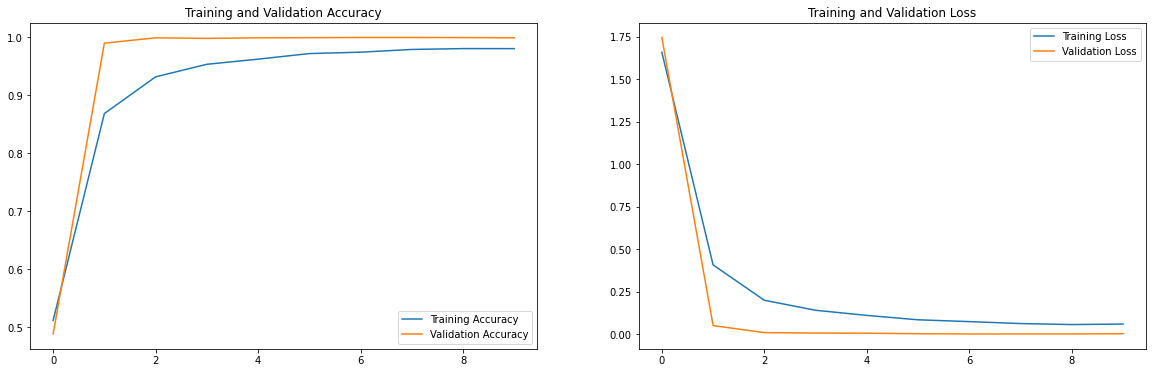

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


### evaluate

In [15]:
model.evaluate(validation_dataset)

80/80 [==============================] - 3s 39ms/step - loss: 0.0042 - accuracy: 0.9986


[0.0042350576259195805, 0.9986236691474915]

In [23]:
predict_val = model.predict(validation_dataset).argmax(axis=1)
predict_val.shape, validation_label.shape

((5086,), (5086,))

In [25]:
predict_val[40:46], validation_label[40:46]

(array([10,  0,  7, 10, 29,  7]), 40    10.0
 41     0.0
 42     7.0
 43    10.0
 44    29.0
 45     7.0
 Name: 0, dtype: float32)